In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.dates as mdates

In [56]:
ds = np.load("dataset_24h.npy", allow_pickle=True)

In [62]:
print(ds.shape)
ds.item().get("72492570")[0][:10]

()


[(157, 20806),
 (154, 21113),
 (153, 21407),
 (151, 21707),
 (148, 22007),
 (148, 22308),
 (157, 22907),
 (157, 23209),
 (156, 23508),
 (127, 25611)]

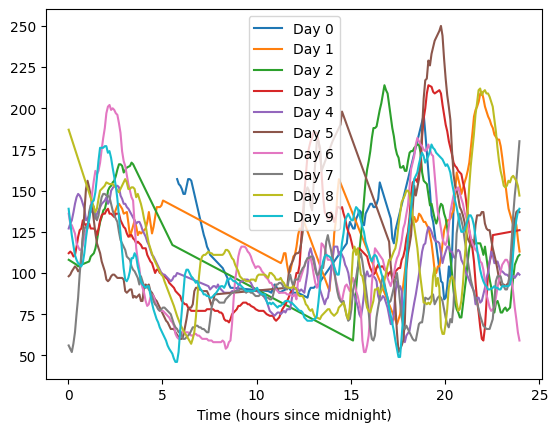

In [60]:

fig, ax = plt.subplots()

for i in range(10):
    day_data = ds.item().get("72492570")[i]
    bg = [t[0] for t in day_data]  # Blood glucose levels
    seconds = [t[1] for t in day_data]  # Seconds of the day

    # Convert seconds to hours
    hours = np.array(seconds) / 3600.0

    ax.plot(hours, bg, label=f"Day {i}")

# Formatting the x-axis to show hours
ax.set_xlabel('Time (hours since midnight)')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


[    0   300   600   900  1200  1500  1800  2100  2400  2700  3000  3300
  3600  3900  4200  4500  4800  5100  5400  5700  6000  6300  6600  6900
  7200  7500  7800  8100  8400  8700  9000  9300  9600  9900 10200 10500
 10800 11100 11400 11700 12000 12300 12600 12900 13200 13500 13800 14100
 14400 14700 15000 15300 15600 15900 16200 16500 16800 17100 17400 17700
 18000 18300 18600 18900 19200 19500 19800 20100 20400 20700 21000 21300
 21600 21900 22200 22500 22800 23100 23400 23700 24000 24300 24600 24900
 25200 25500 25800 26100 26400 26700 27000 27300 27600 27900 28200 28500
 28800 29100 29400 29700 30000 30300 30600 30900 31200 31500 31800 32100
 32400 32700 33000 33300 33600 33900 34200 34500 34800 35100 35400 35700
 36000 36300 36600 36900 37200 37500 37800 38100 38400 38700 39000 39300
 39600 39900 40200 40500 40800 41100 41400 41700 42000 42300 42600 42900
 43200 43500 43800 44100 44400 44700 45000 45300 45600 45900 46200 46500
 46800 47100 47400 47700 48000 48300 48600 48900 49

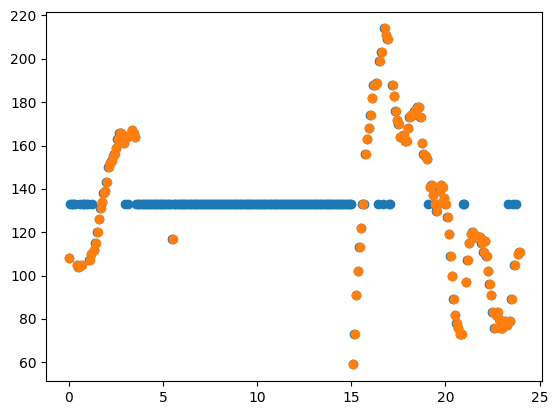

In [81]:
# some days are missing data
# fill in missing data with the mean of the current day

time_stamps = np.arange(0, 24 * 3600, 60 * 5)
print((time_stamps))
def fill_missing_data(day_data):
    bg = [t[0] for t in day_data]  # Blood glucose levels
    mean = np.mean(bg)
    seconds = np.array([t[1] for t in day_data])  # Seconds of the day
    print(seconds)

    # Convert seconds to hours
    # hours = np.array(seconds) / 3600.0

    # just use the mean for missing data
    zeros = np.zeros_like(time_stamps)
    # find the indices to fill
    indices = np.searchsorted(time_stamps, seconds, side='left') -1
    indices[indices == 288] = 287
    # fill the data
    zeros[indices] = bg
    # fill in the missing data with the mean
    zeros[zeros == 0] = mean


    # Return the interpolated data
    return zeros

# test it on day 0
day_data = ds.item().get("72492570")[2]
interpolated_bg = fill_missing_data(day_data)

# Plot the original and interpolated data
plt.scatter(time_stamps / 3600.0, interpolated_bg, label='interpolated')
plt.scatter([t[1] / 3600.0 for t in day_data], [t[0] for t in day_data], label='original')
plt.show()


In [ ]:
# compute GRI and MAGE for each day
def compute_gri(day_data):
    bg = [t[0] for t in day_data]  # Blood glucose levels
    seconds = [t[1] for t in day_data]  # Seconds of the day

    # Convert seconds to hours
    hours = np.array(seconds) / 3600.0

    # Compute the GRI
    gri = np.max(bg) - np.min(bg)

    # Return the GRI
    return gri

def compute_mage(day_data):
    bg = [t[0] for t in day_data]  # Blood glucose levels
    seconds = [t[1] for t in day_data]  # Seconds of the day

    # Convert seconds to hours
    hours = np.array(seconds) / 3600.0

    # Compute the MAGE
    mage = np.max(np.abs(np.diff(bg)))

    # Return the MAGE
    return mage